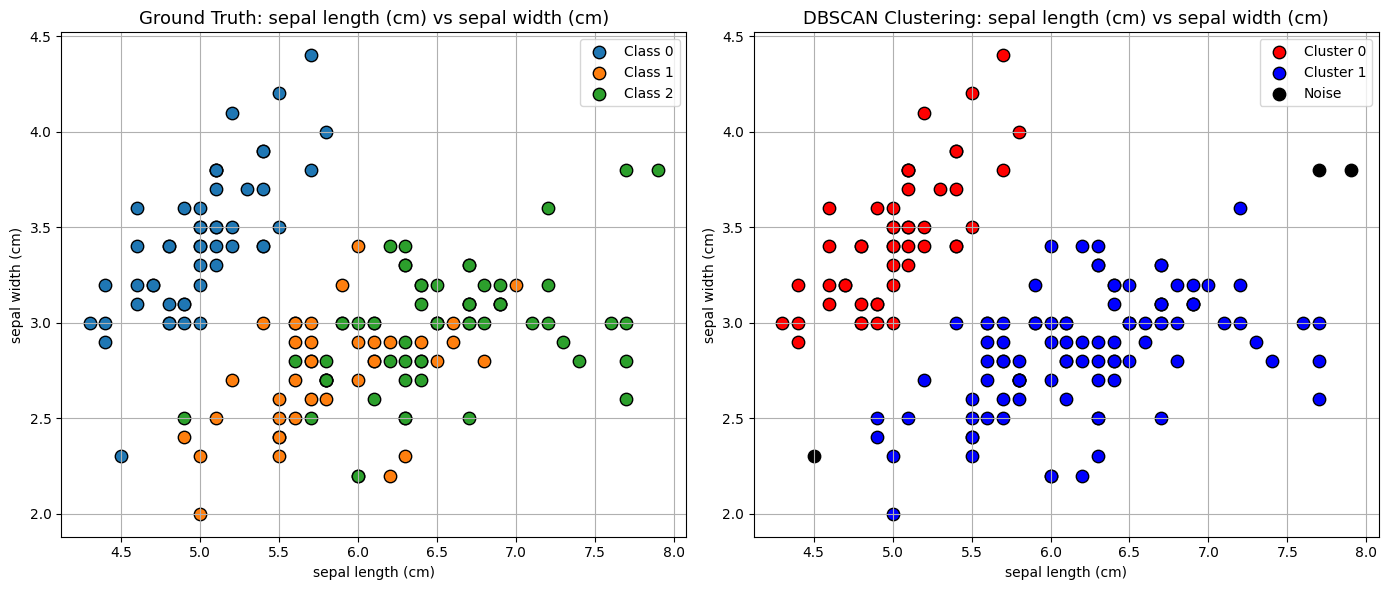

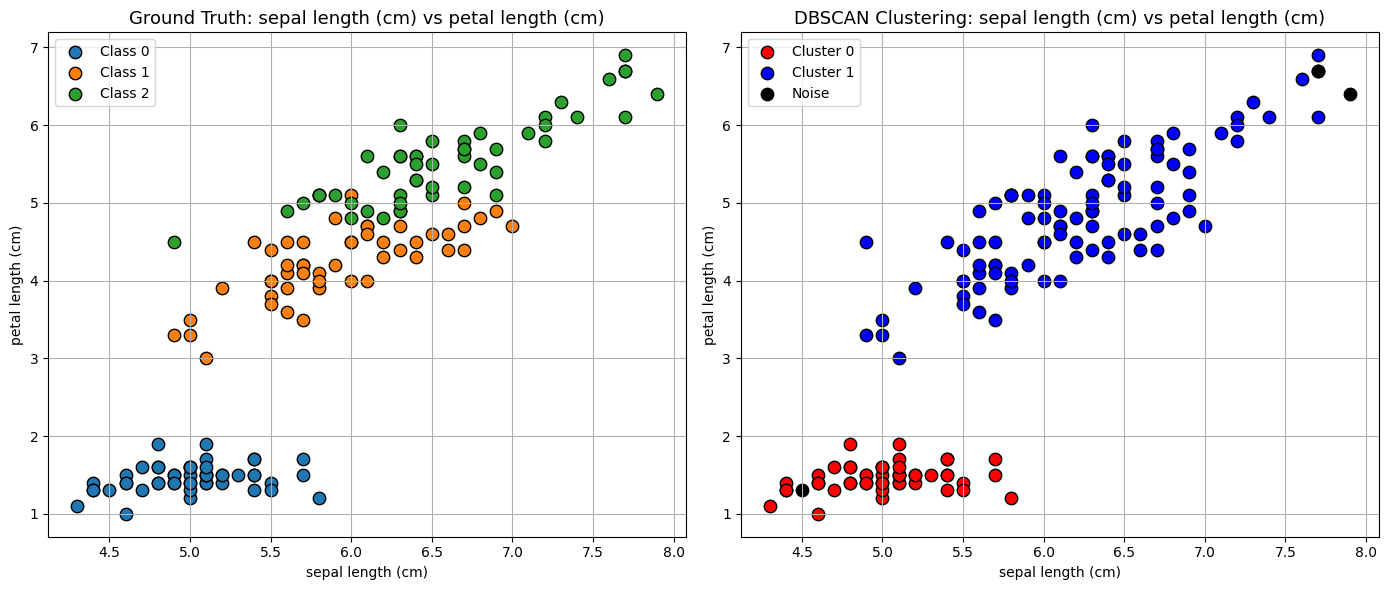

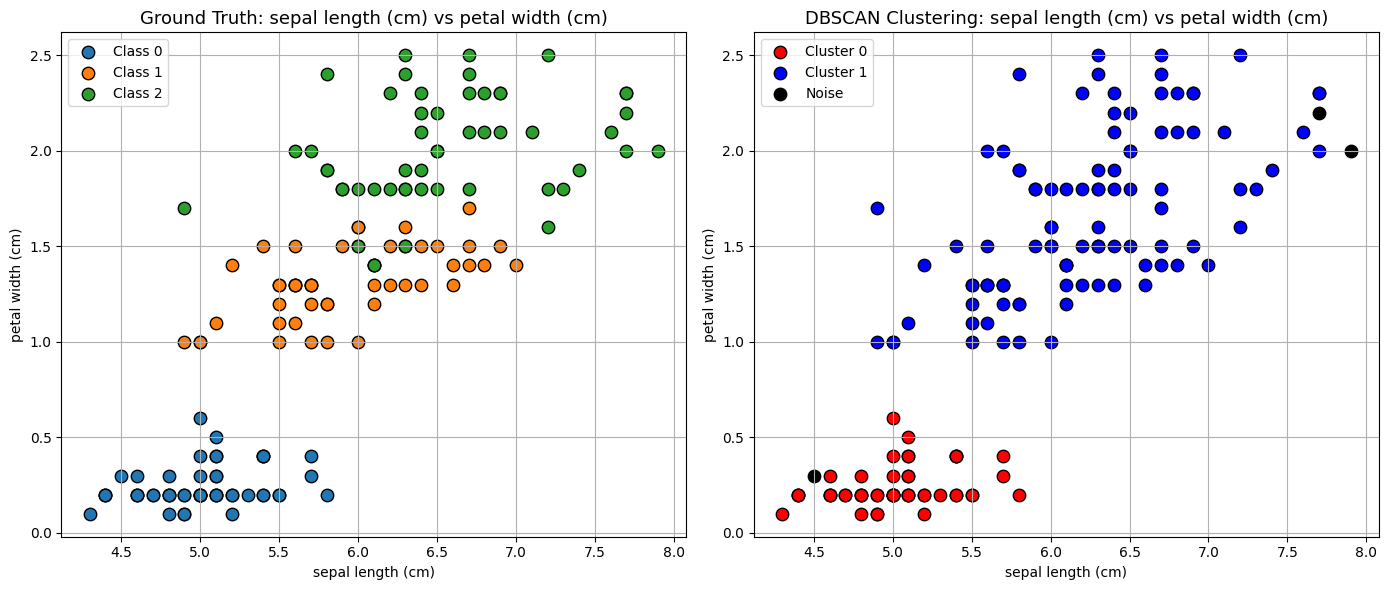

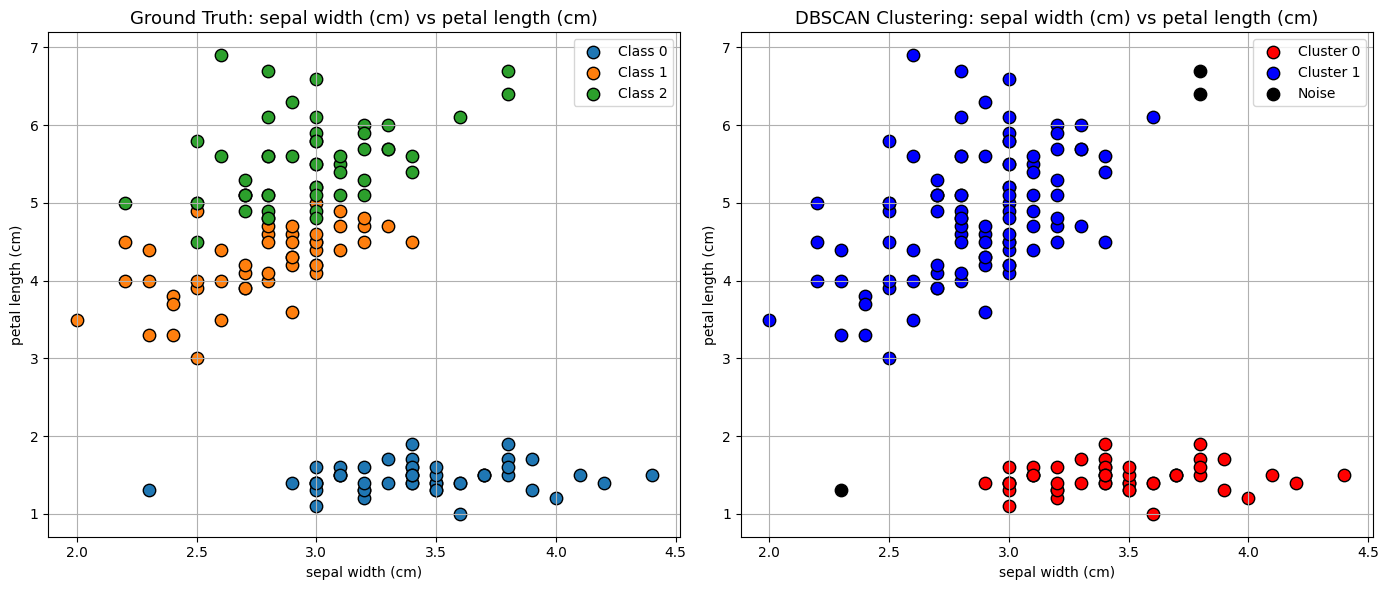

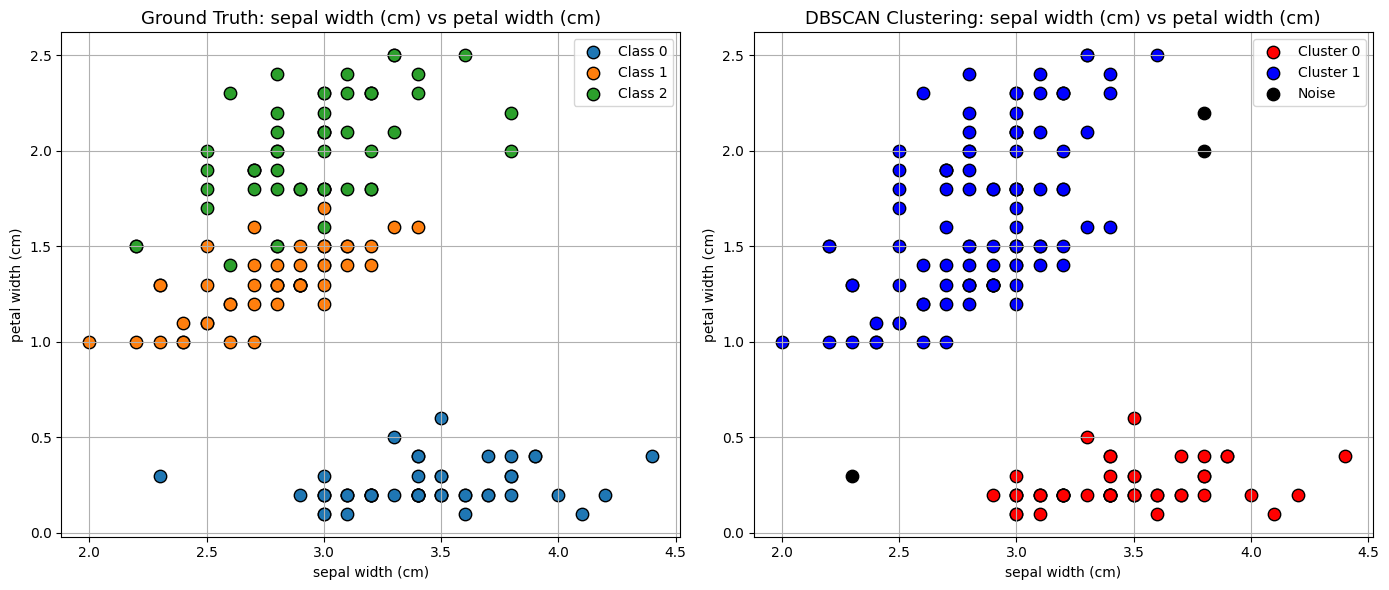

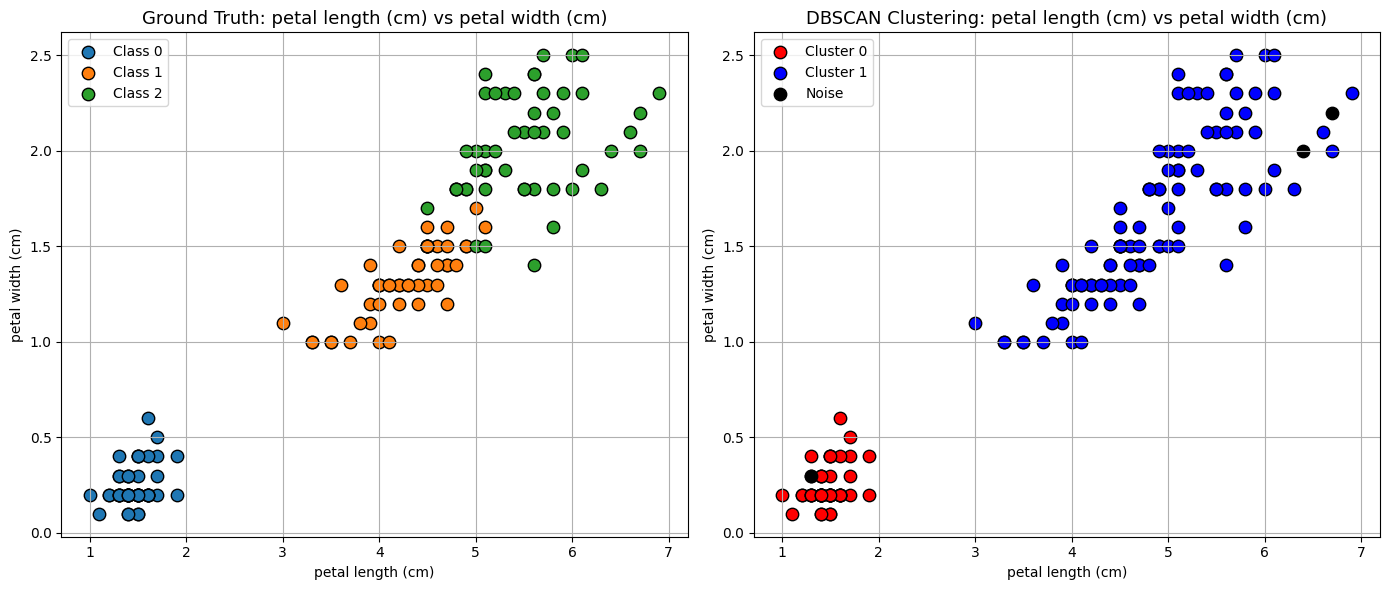

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run DBSCAN once on all features
dbscan = DBSCAN(eps=1, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Generate all combinations of 2 features (j=2)
feature_pairs = list(combinations(range(X.shape[1]), 2))

# Plot each pair
for idx1, idx2 in feature_pairs:
    plt.figure(figsize=(14, 6))

    # Ground truth plot
    plt.subplot(1, 2, 1)
    for label in np.unique(y_true):
        plt.scatter(X[y_true == label, idx1], X[y_true == label, idx2],
                    label=f"Class {label}", s=80, edgecolor='k')
    plt.title(f"Ground Truth: {feature_names[idx1]} vs {feature_names[idx2]}", fontsize=13)
    plt.xlabel(feature_names[idx1])
    plt.ylabel(feature_names[idx2])
    plt.legend()
    plt.grid(True)

    # DBSCAN clustering plot
    plt.subplot(1, 2, 2)
    colors = ['red', 'blue']
    for k in set(labels):
        mask = (labels == k)
        color = 'black' if k == -1 else colors[k % len(colors)]
        label_name = 'Noise' if k == -1 else f'Cluster {k}'
        plt.scatter(X[mask, idx1], X[mask, idx2], c=color, label=label_name,
                    s=80, edgecolor='k')
    plt.title(f"DBSCAN Clustering: {feature_names[idx1]} vs {feature_names[idx2]}", fontsize=13)
    plt.xlabel(feature_names[idx1])
    plt.ylabel(feature_names[idx2])
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()